Test whether calcium intake and drop in blood pressure are associated.
Use the data in http://lib.stat.cmu.edu/DASL/Datafiles/Calcium.html

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
# Read the data into a pandas data frame
calcium_df = pd.read_csv('../data/Calcium_clean.dat', sep='\t')

# Sanity check: print the data frame (only the columns of interest)
calcium_df[['Treatment', 'Decrease']]

,Treatment,Decrease
0,Calcium,7
1,Calcium,-4
2,Calcium,18
3,Calcium,17
4,Calcium,-3
5,Calcium,-5
6,Calcium,1
7,Calcium,10
8,Calcium,11
9,Calcium,-2


The convenion used here is
\begin{align*}
    &Y = 0 \iff \text{Treatment}\\
    &Y = 1 \iff \text{Placebo}
\end{align*}
and $Z$ denotes the decrease in blood pressure.

In [3]:
# Transform the data to match the convention above
data = np.array([
    (1, z)
    if treatment == 'Calcium'
    else (0, z)
    for treatment, z in calcium_df[['Treatment', 'Decrease']].to_numpy()
])

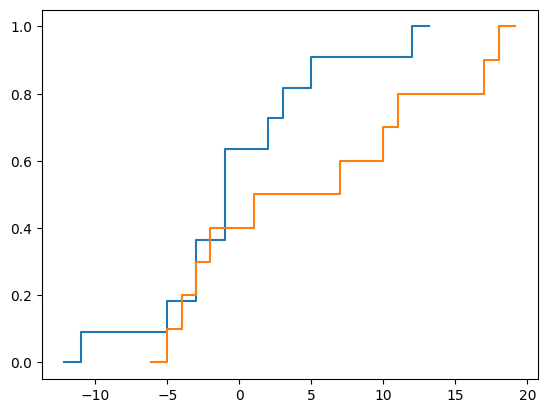

In [4]:
# Sanity check: plot the two empirical CDFs

F0 = scipy.stats.ecdf([z for y, z in data if y==0])
F1 = scipy.stats.ecdf([z for y, z in data if y==1])

F0.cdf.plot()
F1.cdf.plot()
plt.show()

In [5]:
# Perform the Kolmogorov-Smirnov two-sample test for independence

Z = data[:, 1]
ks_test_statistic = np.max(np.abs(
    F0.cdf.evaluate(Z) - F1.cdf.evaluate(Z)
))

Y = data[:, 0]
n0 = sum(1-Y)
n1 = sum(Y)

# The dsitribution known in the notes as the Kolmogorov distribution
# is known to scipy.stats as 'kstwobign'
pval = scipy.stats.kstwobign.sf(
    np.sqrt(n0*n1/(n0+n1))*ks_test_statistic
)

# Report the result
print(
    f"The Kolmogorov-Smirnov test has a pvalue of {pval:.3}"
)

The Kolmogorov-Smirnov test has a pvalue of 0.345


## Analysis of the result
In this instance the Kolmogorov-Smirnov test does not allow us to reject the null that
the variables $Y$ and $Z$ are independent.
In other words we **cannot** conclude from this data that calcium intake
and drop in blood pressure are associated.